In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import uncertainties as u

In [43]:
#file locations
CALIBRATION_DIR = "Data\calibration_data_28_11\\"
SPECTRUM_DIR = "Data\spectrum_data_28_11\\"

#measurement info
N_MEASUREMENTS = 100
N_POINTS= 5000000

In [44]:
#Calculate the mean and standard deviations of both data sets

#calculating means
mean_spectrum_ch1_unscaled=np.zeros(N_POINTS)
mean_spectrum_ch2_unscaled=np.zeros(N_POINTS)
mean_calibration_ch1_unscaled=np.zeros(N_POINTS)
mean_calibration_ch2_unscaled=np.zeros(N_POINTS)

#sum values
for i in range(N_MEASUREMENTS):
    mean_spectrum_ch1_unscaled+=np.fromfile(SPECTRUM_DIR+"ch1_{}.bin".format(i),dtype='int8')
    mean_spectrum_ch2_unscaled+=np.fromfile(SPECTRUM_DIR+"ch2_{}.bin".format(i),dtype='int8')
    mean_calibration_ch1_unscaled+=np.fromfile(CALIBRATION_DIR+"ch1_{}.bin".format(i),dtype='int8')
    mean_calibration_ch2_unscaled+=np.fromfile(CALIBRATION_DIR+"ch2_{}.bin".format(i),dtype='int8')

#divide by number of values
mean_spectrum_ch1_unscaled=mean_spectrum_ch1_unscaled/N_MEASUREMENTS
mean_spectrum_ch2_unscaled=mean_spectrum_ch2_unscaled/N_MEASUREMENTS
mean_calibration_ch1_unscaled=mean_calibration_ch1_unscaled/N_MEASUREMENTS
mean_calibration_ch2_unscaled=mean_calibration_ch2_unscaled/N_MEASUREMENTS

#calculating standard deviations
std_spectrum_ch1_unscaled=np.zeros(N_POINTS)
std_spectrum_ch2_unscaled=np.zeros(N_POINTS)
std_calibration_ch1_unscaled=np.zeros(N_POINTS)
std_calibration_ch2_unscaled=np.zeros(N_POINTS)

#sum deviations squared
for i in range(N_MEASUREMENTS):
    std_spectrum_ch1_unscaled+=(np.fromfile(SPECTRUM_DIR+"ch1_{}.bin".format(i),dtype='int8')-mean_spectrum_ch1_unscaled)**2
    std_spectrum_ch2_unscaled+=(np.fromfile(SPECTRUM_DIR+"ch2_{}.bin".format(i),dtype='int8')-mean_spectrum_ch2_unscaled)**2
    std_calibration_ch1_unscaled+=(np.fromfile(CALIBRATION_DIR+"ch1_{}.bin".format(i),dtype='int8')-mean_calibration_ch1_unscaled)**2
    std_calibration_ch2_unscaled+=(np.fromfile(CALIBRATION_DIR+"ch2_{}.bin".format(i),dtype='int8')-mean_calibration_ch2_unscaled)**2

#divide by the degrees of freedom
std_spectrum_ch1_unscaled=np.sqrt(std_spectrum_ch1_unscaled/(N_MEASUREMENTS-1))
std_spectrum_ch2_unscaled=np.sqrt(std_spectrum_ch2_unscaled/(N_MEASUREMENTS-1))
std_calibration_ch1_unscaled=np.sqrt(std_calibration_ch1_unscaled/(N_MEASUREMENTS-1))
std_calibration_ch2_unscaled=np.sqrt(std_calibration_ch2_unscaled/(N_MEASUREMENTS-1))

In [45]:
#generate unscaled time data

spectrum_time_ch1_unscaled=np.arange(0,N_POINTS)
calibration_time_ch1_unscaled=np.arange(0,N_POINTS)
spectrum_time_ch2_unscaled=np.arange(0,N_POINTS)
calibration_time_ch2_unscaled=np.arange(0,N_POINTS)

In [46]:
#scaling paramiters

SPECTRUM_CH1_XZERO=0
SPECTRUM_CH1_XINCR=1
SPECTRUM_CH1_YZERO=0
SPECTRUM_CH1_YMULT=1

SPECTRUM_CH2_XZERO=0
SPECTRUM_CH2_XINCR=1
SPECTRUM_CH2_YZERO=0
SPECTRUM_CH2_YMULT=1

CALIBRATION_CH1_XZERO=0
CALIBRATION_CH1_XINCR=1
CALIBRATION_CH1_YZERO=0
CALIBRATION_CH1_YMULT=1

CALIBRATION_CH2_XZERO=0
CALIBRATION_CH2_XINCR=1
CALIBRATION_CH2_YZERO=0
CALIBRATION_CH2_YMULT=1

In [47]:
#scaling data

mean_spectrum_ch1=(SPECTRUM_CH1_YMULT*mean_spectrum_ch1_unscaled)+SPECTRUM_CH1_YZERO
mean_spectrum_ch2=(SPECTRUM_CH2_YMULT*mean_spectrum_ch2_unscaled)+SPECTRUM_CH2_YZERO

mean_calibration_ch1=(CALIBRATION_CH1_YMULT*mean_calibration_ch1_unscaled)+CALIBRATION_CH1_YZERO
mean_calibration_ch2=(CALIBRATION_CH2_YMULT*mean_calibration_ch2_unscaled)+CALIBRATION_CH2_YZERO

spectrum_time_ch1=(SPECTRUM_CH1_XINCR*spectrum_time_ch1_unscaled)+SPECTRUM_CH1_XZERO
spectrum_time_ch2=(SPECTRUM_CH1_XINCR*spectrum_time_ch2_unscaled)+SPECTRUM_CH2_XZERO

calibration_time_ch1=(CALIBRATION_CH1_XINCR*calibration_time_ch1_unscaled)+CALIBRATION_CH1_XZERO
calibration_time_ch2=(CALIBRATION_CH2_XINCR*calibration_time_ch2_unscaled)+CALIBRATION_CH2_XZERO

std_spectrum_ch1=(SPECTRUM_CH1_YMULT*std_spectrum_ch1_unscaled)+SPECTRUM_CH1_YZERO
std_spectrum_ch2=(SPECTRUM_CH2_YMULT*std_spectrum_ch2_unscaled)+SPECTRUM_CH2_YZERO

std_calibration_ch1=(CALIBRATION_CH1_YMULT*std_calibration_ch1_unscaled)+CALIBRATION_CH1_YZERO
std_calibration_ch2=(CALIBRATION_CH2_YMULT*std_calibration_ch2_unscaled)+CALIBRATION_CH2_YZERO

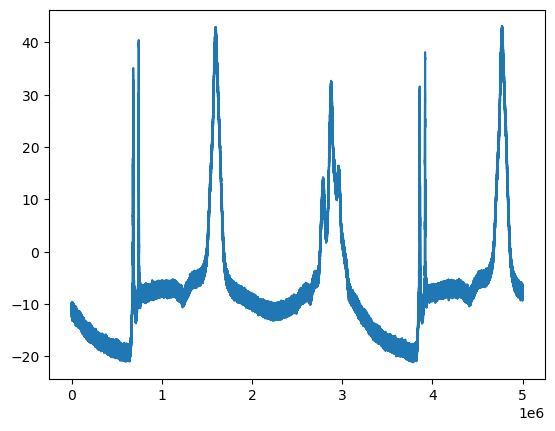

In [49]:
plt.plot(spectrum_time_ch1,mean_spectrum_ch1)
plt.show()